* * *
<pre> NYU Paris            <i> Machine Learning - Sumer 2023 </i></pre>
* * *


<h1 align="center"> Lab Unsupervised learning: clustering </h1>

<pre align="left"> June 08th 2023               <i> Author: Guillaume Staerman </i></pre>
* * *


##### Goals:
- More practice with numpy and matplotlib
- Understand the pros and cons of K-means clustering, hierarchical clustering and GMM

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

seed = 42

# Part 1: Implementing K-means

In the past labs, we have mainly seen:
- dimension reduction (with PCA)
- classification (i.e supervised learning)

In practice however, the vast majority of data does not have labels. Finding structure and patterns in data without labels is called unsupervised learning. Given a specified number of clusters K, the K-means algorithm forms a partition of your data with K different groups while trying to:
- minimize the variance within groups (i.e samples forming a group must be close to each other)
- maximize the variance between groups (i.e groups must be far from each other).

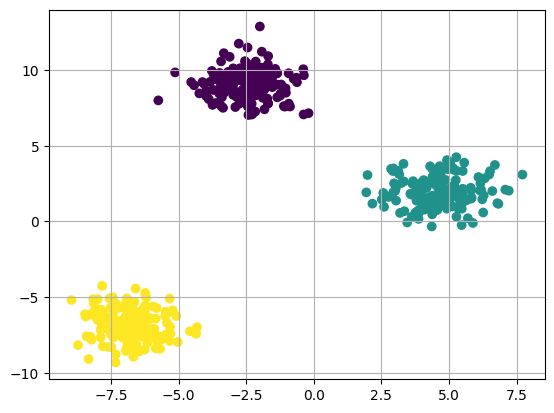

In [311]:
from sklearn.datasets import make_blobs

X, y = make_blobs(500, centers=3, n_features=2, cluster_std=1., random_state=seed)

plt.figure()
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()


It is called K-means because it only consists of two steps. Starting from an initialization of K mean values $M_k$:
- For each sample $x$ of your data, find the mean (centroid) $C_k$ that is closest to x. Assign $x$ to group $k$.
- Update the mean $C_k$ of each group k

### Question 1
Write a function that generates K random initializations for the group centroids $C_k$. 

In [312]:
def init_centroids(K, dimension=2):
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]
    return centroids

### Question 2
Write a function that takes the data X (n, d) and returns an array (n,) containing the id of the cluster it should be assigned to. For example, the function returns [0, 0, 2, 1, 2] if the first two samples are assigned to cluster 0, the 3rd and 5th samples to cluster 2 and the 4th sample to cluster 1. 

_Hint: look up `sklearn.metrics.pairwise_distances` and the numpy method of an array `array.argmin`_

In [313]:
from sklearn.metrics.pairwise import pairwise_distances
def assign_labels(X, centroids):
    distances = pairwise_distances(X, centroids)
    labels = distances.argmin(axis=1)
    return labels

### Question 3
The following cell visualizes the centroids and their assigned samples. Initialize the centroids and compute a first set of labels of your data and visualize them. Can you think of a smarter way to initialize these centroids using the data? (No need to implement it for now).

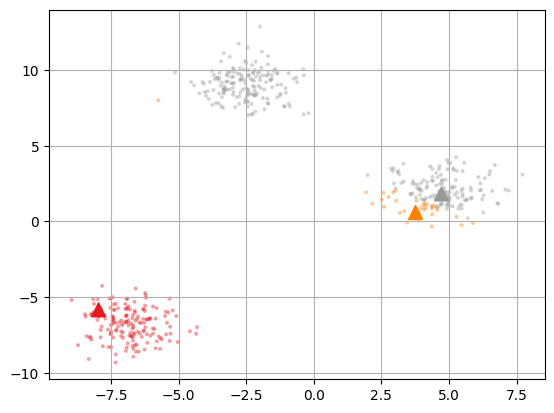

In [314]:
def plot_kmeans(X, labels, centroids):
    K = len(centroids)
    colors = np.array(cm.Set1(np.linspace(0., 1, K)))
    plt.figure()
    plt.grid()
    plt.scatter(X[:, 0], X[:, 1], color=colors[labels], s=4, alpha=0.3)
    plt.scatter(centroids[:, 0], centroids[:, 1], color=colors, marker="^", s=100)
    plt.show()
centroids = init_centroids(3)
labels = assign_labels(X, centroids)
plot_kmeans(X , labels, centroids)

One better way to initialize can be by first randomly taking a point as centroid and then finding another point that is the furthest away from that point. We can repeat this finding points that has the maximum combined distance with respect to each already selected centroids. This is computationally expensive to do on the whole set so we can do on a small sample or subset of data for a good enough starting point.

### Question 4
Write a function that computes the new centroids using the assigned labels. Visualize the new centroids. Repeat these steps (label assignment + centroid update) for 2-3 steps. Does it converge?

In [315]:
def update_centroids(X, labels, centroids):
    n = len(centroids)
    d = X.shape[1]
    total = np.zeros((n, d))
    count = np.zeros(n)
    for i in range(len(X)):
        total[labels[i]]+=X[i]
        count[labels[i]]+=1
    for j in range(n):
        if count[j] > 0:
            centroids[j] = total[j] / count[j]
        else:
            centroids[j] = np.random.uniform(size=(X.shape[1],))
    return centroids

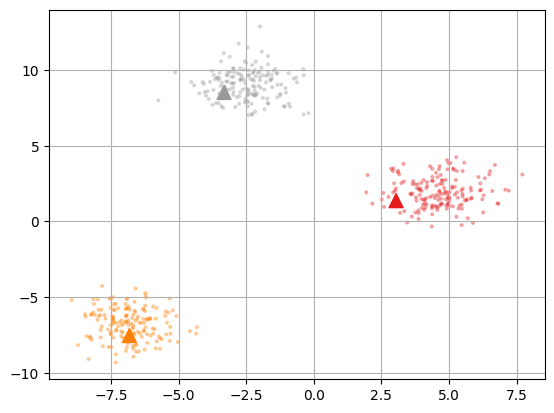

[[ 3.04545118  1.37379466]
 [-6.81999682 -7.52704637]
 [-3.31769123  8.51252908]]


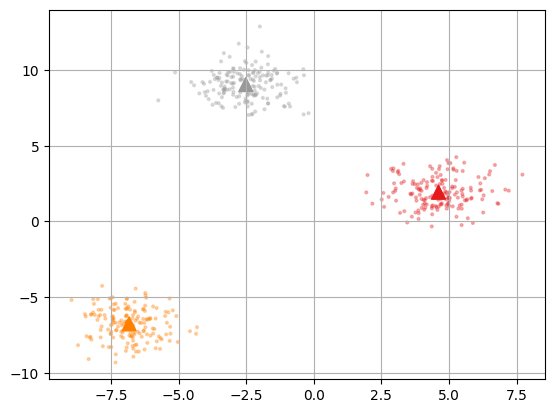

[[ 4.61416263  1.93184055]
 [-6.83120002 -6.75657544]
 [-2.51336974  9.03492867]]


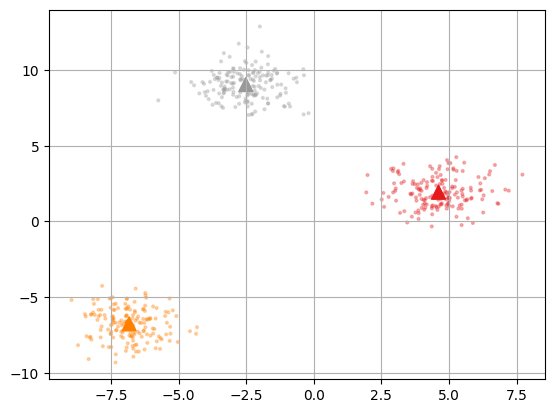

[[ 4.61416263  1.93184055]
 [-6.83120002 -6.75657544]
 [-2.51336974  9.03492867]]


In [316]:
centroids = init_centroids(3)
for i in range(3):
    labels = assign_labels(X, centroids)
    plot_kmeans(X, labels, centroids)
    print(centroids)
    update_centroids(X, labels, centroids)

Since the data is so obviously separated, whether it converges or not heavily relies on the random innitialization of centroids. If the initialization give 3 centroidse each from 3 different clusters, then it will definitely converge in 1 or 2 iteration. Else, it might take a little more.

### Question 5
The K-means algorithm repeats these operations until the centroids stop changing. Write a function summing up all these operations.

In [318]:
def Kmeans(X, K=3, maxiter=100, plot_steps=False):
    dimension = X.shape[1]
    ## initialization to do
    centroids = init_centroids(K,dimension)
    for ii in range(maxiter):
        ## Kmeans 2 steps to do
        oldval = np.copy(centroids)
        labels = assign_labels(X, centroids)
        update_centroids(X, labels, centroids)
        
        if plot_steps:
            plot_kmeans(X, labels, centroids)

        if  np.array_equal(oldval, centroids):
            print("Converged at ",ii)
            break

    return labels, centroids

### Question 6

Generate different sets of data examples (changing the `cluster_std` parameter) and visualize the K-means output. What do you notice? 

cluster_std =  0.1


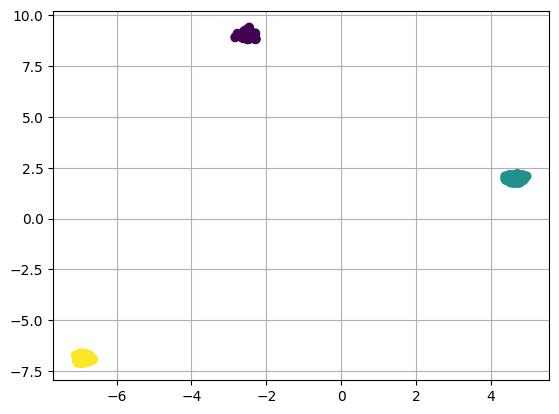

Converged at  2


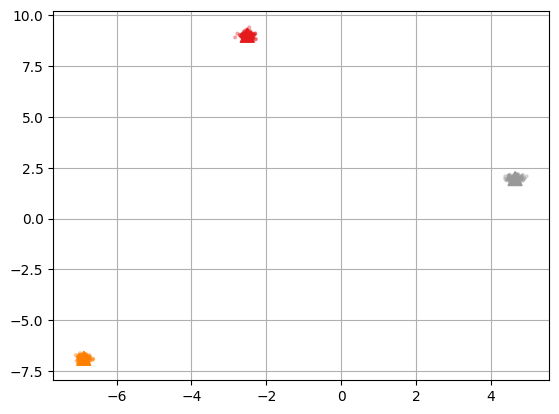

cluster_std =  1


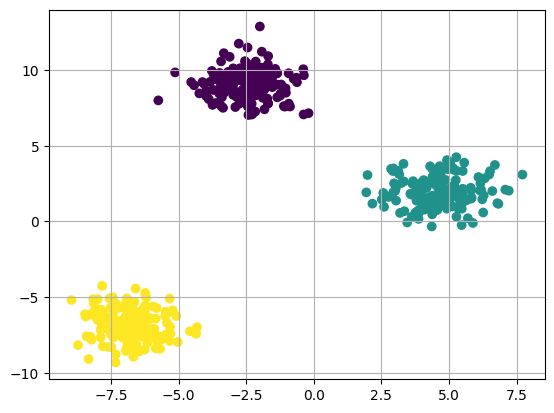

Converged at  1


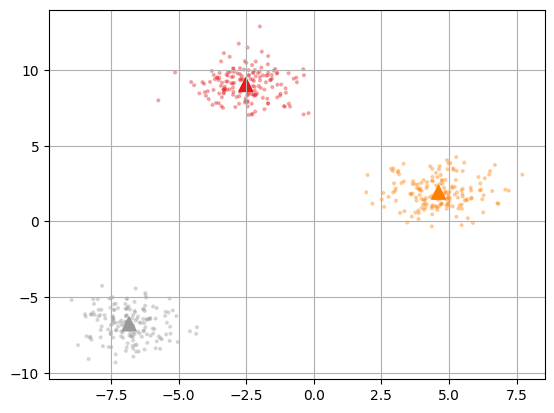

cluster_std =  2


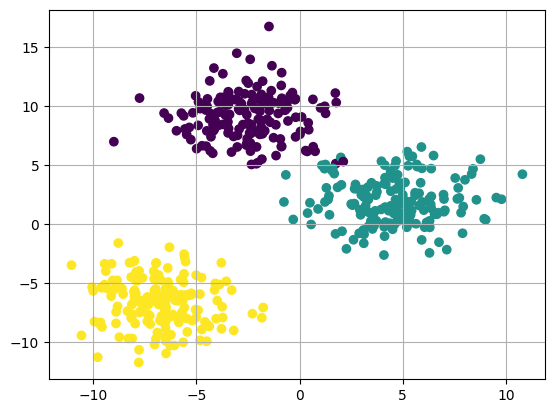

Converged at  3


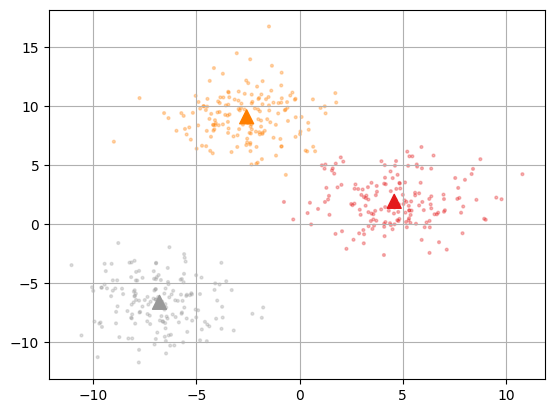

cluster_std =  5


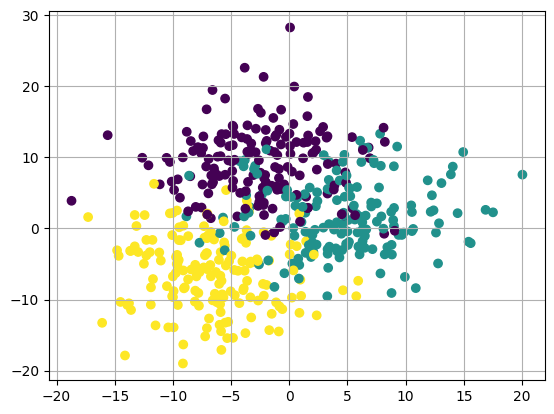

Converged at  21


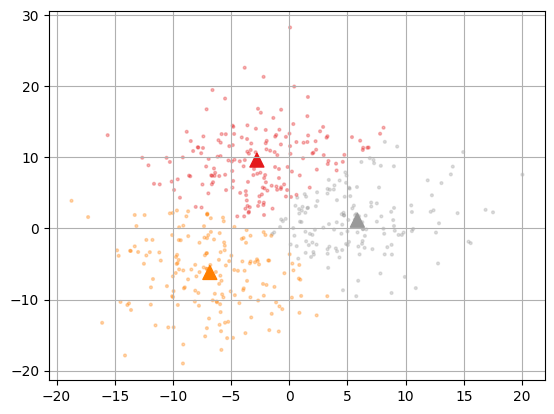

cluster_std =  10


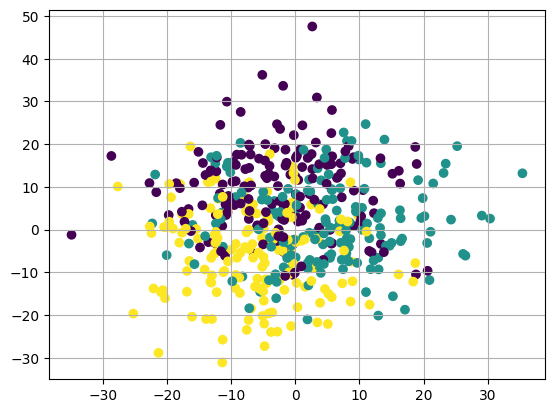

Converged at  13


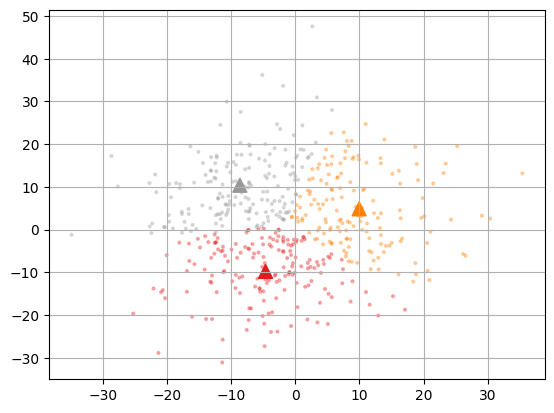

In [324]:
values = [0.1,1,2,5,10]
for val in values:
    X, y = make_blobs(500, centers=3, n_features=2, cluster_std=val, random_state=seed)
    print("cluster_std = ", val)
    plt.figure()
    plt.grid()
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()
    
    labels,centroids = Kmeans(X,K=3)
    plot_kmeans(X, labels, centroids)

As we keep increasing the variance of values, K-means seems to be failing. It works perfectly on data with clusters that is not overlapping and spherical. But with overlap, it converges on a point where clustering does not seem to work properly.

</br>There seems to be a general trend increase in convergence steps as the data are more scattered which makes sense as there is overlapping of the clusters so finding a minima will take a little more iterations. But again, it depends on the intialization since we are dealing with not so complicated data.

### Question 7
Try Kmeans with this new data. Choose K wisely. Is it normal that Kmeans fails?

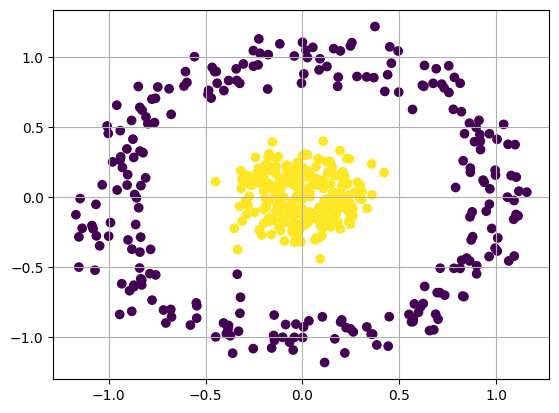

In [321]:
from sklearn.datasets import make_circles

X, y = make_circles(500, noise=0.1, factor=0.2)
plt.figure()
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

Converged at  8


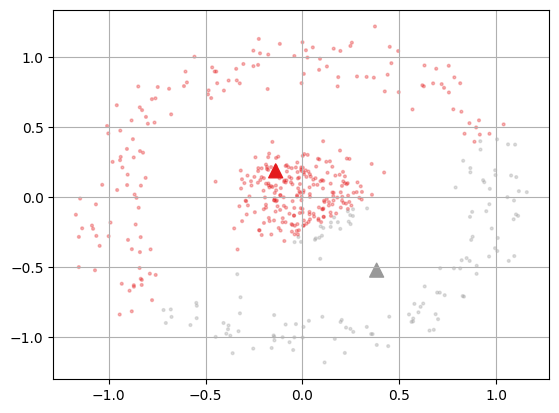

In [322]:
labels,centroids = Kmeans(X,K=2)
plot_kmeans(X, labels, centroids)

K means fails since it only works on spherical clusters without overlap as it takes the euclidean distance for computing the similarity.

# Part 2: Compressing images with K-means
Is it often the case that data is redundant. Take the example of the image below:

Image original shape:  (427, 640, 3)
Flower colors shape:  (273280, 3)


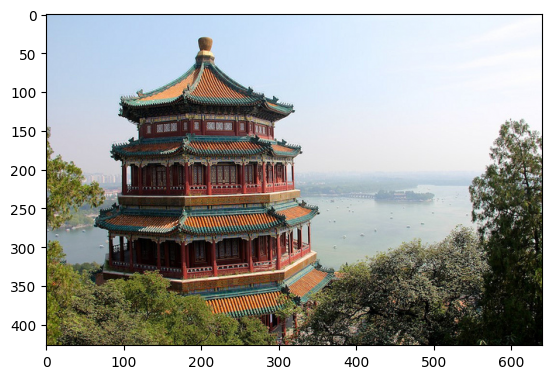

In [235]:
from sklearn.datasets import load_sample_image

flower = load_sample_image('china.jpg') / 255
flower_shape = flower.shape
flower_colors = flower.reshape(-1, 3)

print("Image original shape: ", flower_shape)
print("Flower colors shape: ", flower_colors.shape)

max_color = flower.max()

plt.figure()
plt.imshow(flower)
plt.show()

### Question 8
We would like to replace all colors by replacing them with the centroid they're closest to. Let's for example reduce them to 16. Run the Kmeans algorithm with K=16 on the downsampled colors array X. Then create a new image with the replaced colors and visualize it.

In [249]:
from sklearn.utils import shuffle
from sklearn.cluster import KMeans
X = shuffle(flower_colors, random_state=0, n_samples=1_000)

def Kmeans_image(k=16):
    _, centroids = Kmeans(X,K=k)
    distances = np.sqrt(((flower_colors[:, np.newaxis, :] - centroids)**2).sum(axis=2))
    labels = np.argmin(distances, axis=1)

    new_image = centroids[labels].reshape(flower_shape)
    plt.figure()
    plt.imshow(new_image)
    plt.show()

Converged at  92


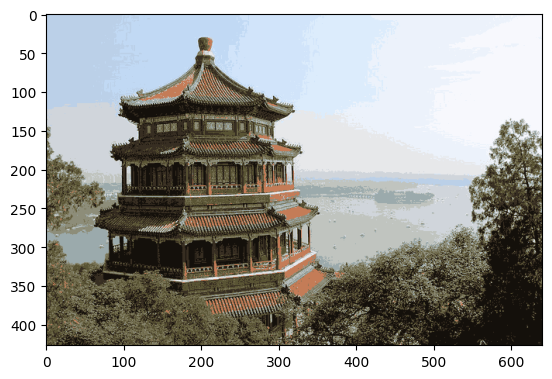

In [250]:
Kmeans_image()

### Question 9
Play around with the value of n_clusters (K). What do you notice?

k =  1
Converged at  1


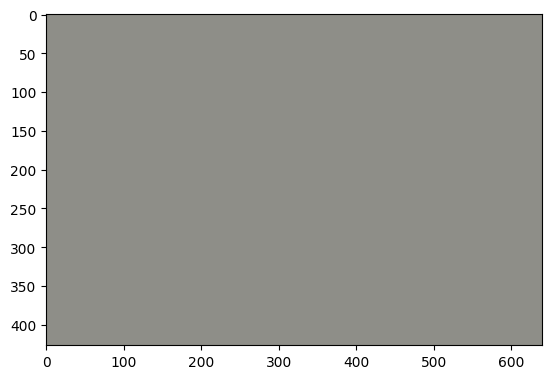

k =  2
Converged at  5


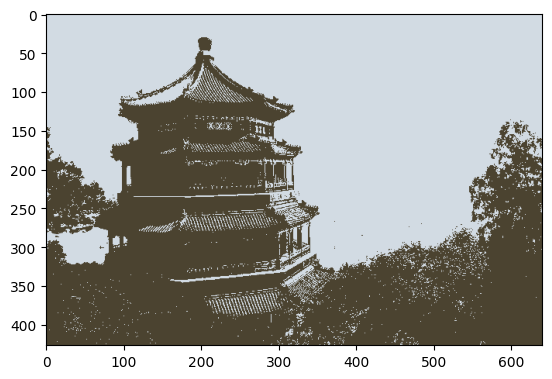

k =  10
Converged at  10


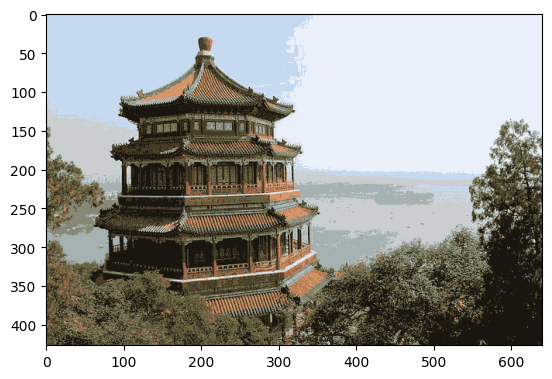

k =  16
Converged at  17


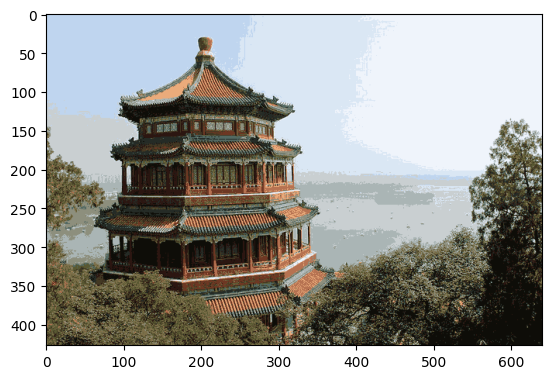

k =  50
Converged at  16


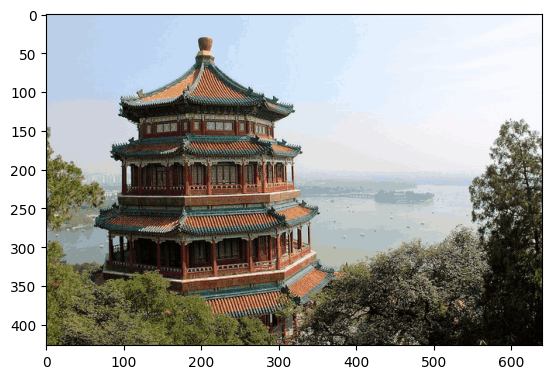

k =  500


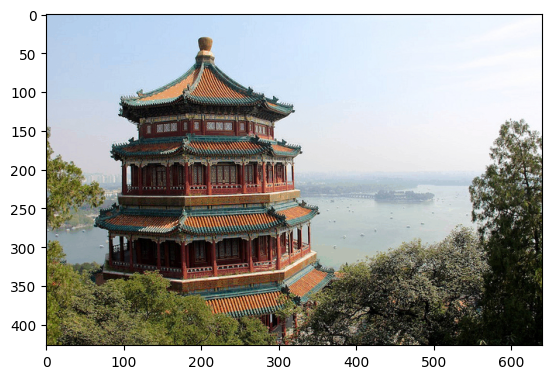

In [251]:
l = [1,2,10,16,50,500]
for i in l:
    print ("k = ",i)
    Kmeans_image(i)

As we keep on increasing k, the image gets better with more distinct colors. But after a certain point, the increase in k doesnt have a significant visual difference. Simplifying these images in this way can be a good way to reduce complexity when processing these images in some algorithms (like CNNs).

### Question 10
Try this out but using the sklearn implementation of Kmeans. Do you obtain similar results? Can you explain the difference?

In [253]:
sk_kmeans = KMeans(n_clusters=16, random_state=seed)

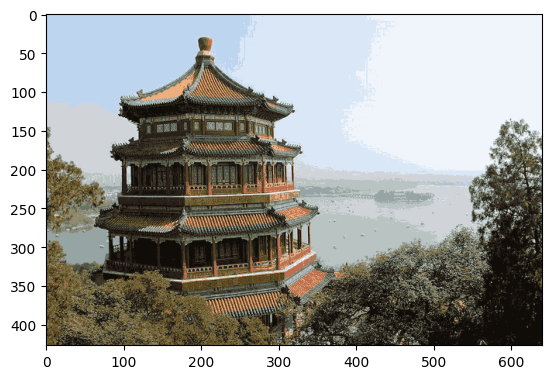

In [254]:
sk_kmeans.fit(X)
centroids = sk_kmeans.cluster_centers_
labels = sk_kmeans.predict(flower_colors)

new_image = centroids[labels].reshape(flower_shape)
plt.figure()
plt.imshow(new_image)
plt.show()

There is no noticable significant difference.

# Part 3: Implementing  Hierarchical clustering


## Question 11

Implement a function that compute the distance matrix between data. The parameter 'distance' define the chosen distance on the Euclidean space. You can use functions from scipy or sklearn. Implement three distances of your choice.

In [44]:
from sklearn.datasets import make_blobs
from sklearn.metrics.pairwise import pairwise_distances
def distance_matrix(X, distance='euclidean'):
    matrix = pairwise_distances(X, metric=distance)
    return matrix

The Pairwise_Distance can support 'euclidean', 'manhattan' and 'cosine' distance as metric.

## Question 12

Implement diffent similarity functions between clusters that you have seen in class (Linkage slide). Regarding the question 13, find a clever way to implement cluster variable (cluster1, cluster2).

In [325]:
def cluster_similarity(cluster1, cluster2, X, matrix_distance, linkage, distance='euclidean'):

    if linkage == 'single':
        cluster_distance = np.min([matrix_distance[i, j] for i in cluster1 for j in cluster2])

    elif linkage == 'complete':
        cluster_distance = np.max([matrix_distance[i, j] for i in cluster1 for j in cluster2])

    elif linkage == 'centroid':
        centroid1 = np.mean(X[cluster1], axis=0)
        centroid2 = np.mean(X[cluster2], axis=0)
        cluster_distance = np.linalg.norm(centroid1 - centroid2) 

    elif linkage == 'average':
        cluster_distance = np.mean([matrix_distance[i, j] for i in cluster1 for j in cluster2])
        
    return cluster_distance

A clever way might be to keep track of the order in which the clusters are being merged along with the distance so that we can obtain a dendrogram for visually separating optimal clusters.

## Question 13

Implement a function that performs Agglomerative Hierarchical Clustering.

In [344]:
def agglo_hier_clust(X, linkage_type='single', distance='euclidean'):
    n_samples = len(X)
    clusters = [[i] for i in range(n_samples)]
    matrix_distance = distance_matrix(X)

    cluster_ids = [i for i in range(n_samples)]
    next_id = n_samples
    Z = []
    
    while len(clusters) > 1:
        min_dist = float('inf')
        best_pair = None
        
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = cluster_similarity(clusters[i], clusters[j], X, matrix_distance, linkage_type, distance)
                if dist < min_dist:
                    min_dist = dist
                    best_pair = (i, j)
        
        i, j = best_pair
        
        id_i = cluster_ids[i]
        id_j = cluster_ids[j]
        
        Z.append([id_i, id_j, min_dist, len(clusters[i]) + len(clusters[j])])
        
        merged_cluster = clusters[i] + clusters[j]
        
        del clusters[max(i, j)] 
        del clusters[min(i, j)]
        clusters.append(merged_cluster)
        
        del cluster_ids[max(i, j)]
        del cluster_ids[min(i, j)]
        cluster_ids.append(next_id)
        next_id += 1

    return np.array(Z)

X, y = make_blobs(10, centers=3, n_features=2, cluster_std=1., random_state=seed)

Z = agglo_hier_clust(X, linkage_type='single', distance='euclidean')
print(Z)

[[ 5.          9.          1.00830799  2.        ]
 [ 2.          7.          1.12932761  2.        ]
 [ 8.         11.          1.17891599  3.        ]
 [ 4.         10.          1.61026809  3.        ]
 [ 1.          3.          1.65309398  2.        ]
 [ 0.         14.          1.84181288  3.        ]
 [ 6.         13.          2.06099196  4.        ]
 [12.         16.          7.61007297  7.        ]
 [15.         17.         11.91245441 10.        ]]


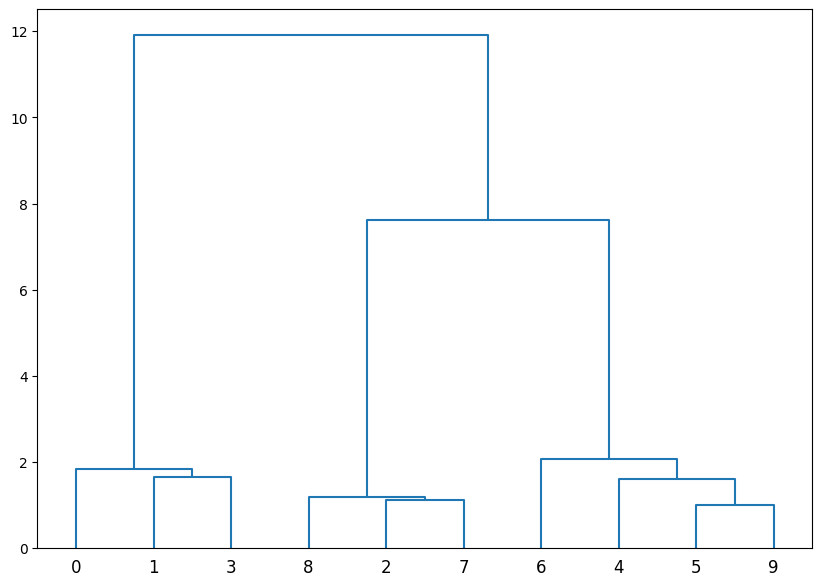

In [330]:
from scipy.cluster.hierarchy import dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z,color_threshold=0)
plt.show()

## Question 14 (Bonus)

Implement a function that performs Divisive Hierarchical Clustering.

In [331]:
def divisive_hier_clust(X, linkage, threshold):
    matrix_distance = distance_matrix(X)
    
    def get_farthest_points(cluster):
        max_dist = -1
        far_pair = (None, None)
        for i in range(len(cluster)):
            for j in range(i + 1, len(cluster)):
                dist = matrix_distance[cluster[i]][cluster[j]]
                if dist > max_dist:
                    max_dist = dist
                    far_pair = (cluster[i], cluster[j])
        return far_pair[0], far_pair[1], max_dist

    def split_cluster(cluster):
        a, b, _ = get_farthest_points(cluster)
        group1 = [a]
        group2 = [b]
        
        for idx in cluster:
            if idx == a or idx == b:
                continue
            dist_a = matrix_distance[idx][a]
            dist_b = matrix_distance[idx][b]
            if dist_a < dist_b:
                group1.append(idx)
            else:
                group2.append(idx)
        return [group1, group2]

    clusters = [list(range(len(X)))]
    i = 0
    while i < len(clusters):
        cluster = clusters[i]
        _, _, max_dist = get_farthest_points(cluster)
        if max_dist > threshold and len(cluster) > 1:
            new_clusters = split_cluster(cluster)
            clusters.pop(i)
            clusters.extend(new_clusters)
        else:
            i += 1
    
    return clusters

## Question 15

Apply this (or these) algorithm(s) on the Gaussian blobs

In [332]:
divisive_hier_clust(X,'single',5)

[[3, 0, 1], [5, 6, 4, 9], [8, 2, 7]]

## Question 16

Use now the scipy implementation of the hierarchical clustering algorithm and visualize the associated dendrogram. How many clusters should you choose inspecting the dendrogram? According to this number of cluster, compute the accuracy of the algorithm

In [345]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X)
print(Z)

[[ 5.          9.          1.00830799  2.        ]
 [ 2.          7.          1.12932761  2.        ]
 [ 8.         11.          1.17891599  3.        ]
 [ 4.         10.          1.61026809  3.        ]
 [ 1.          3.          1.65309398  2.        ]
 [ 0.         14.          1.84181288  3.        ]
 [ 6.         13.          2.06099196  4.        ]
 [12.         16.          7.61007297  7.        ]
 [15.         17.         11.91245441 10.        ]]


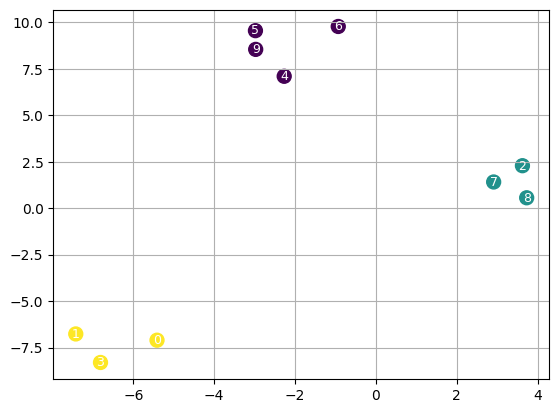

In [346]:
plt.figure()
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y, s=100)

for i in range(len(X)):
    plt.text(X[i, 0], X[i, 1], str(i), fontsize=9, color='white', ha='center', va='center')
plt.show()

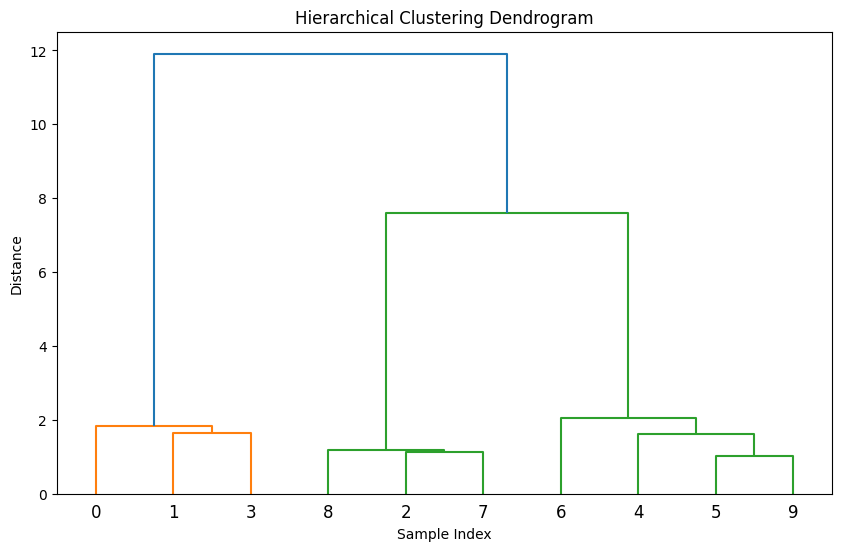

In [347]:
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

According to this dendrogram, 3 cluster should be suitable. In this particular case, we get a 100 percent accuracy as the 3 cluster's labels matches with the dataset. But for a bigger dataset or cases where two clusters are closeby in the eucliddean plane, it might not be obvious and we can end up mixing two clusters which should not have been combined.

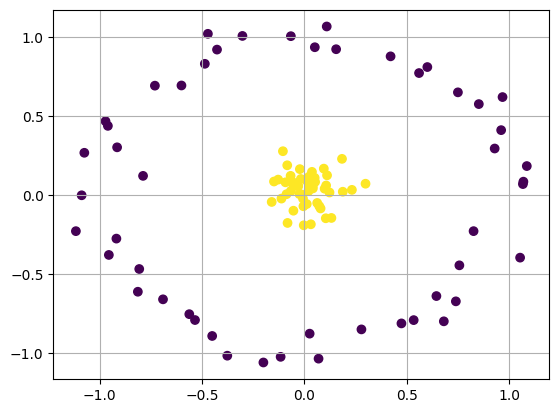

In [353]:
X, y = make_circles(100, noise=0.1, factor=0.01)
plt.figure()
plt.grid()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

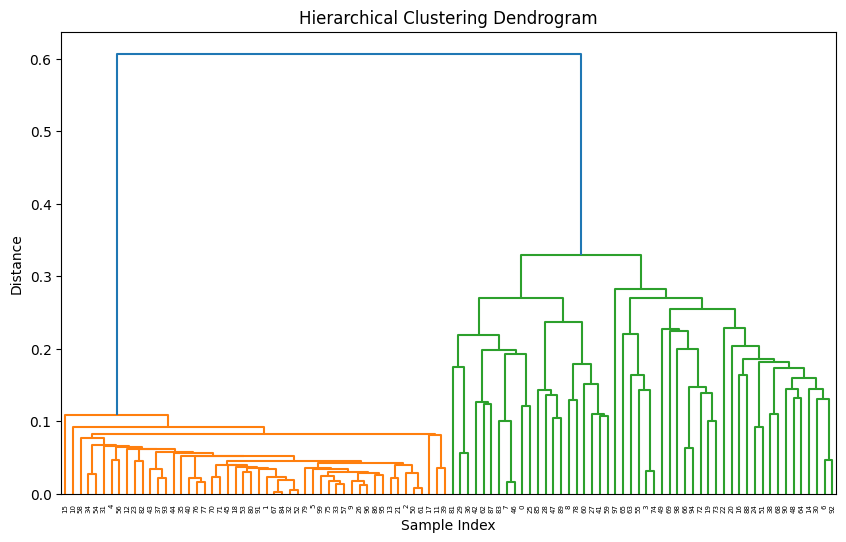

In [354]:
Z = linkage(X)
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

Comparing to the case of concentric data where kmeans failed, we can see that with the use of hierarchical clustering, there is a clear difference in two clusters which in this case happened to be the smaller and the bigger circle. So although computationally this algorithm is expensive, it can be used to find pattern in the data and hence more accurate clusters depending on the case.

# Part 4: Clustering Algorithms Comparison

## Question 17

- Import three images datasets as we did in previous labs: MNIST, FashionMNIST and CIFAR10. Vectorize these images to have vector input data.

In [300]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Load transforms
transform = transforms.Compose([transforms.ToTensor()])

# Load datasets
mnist = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
fashion = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
cifar = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)

# Extract one image from each
mnist_img, mnist_label = mnist[0]
fashion_img, fashion_label = fashion[0]
cifar_img, cifar_label = cifar[0]

# Vectorize
mnist_vector = mnist_img.view(-1, 1).numpy()
fashion_vector = fashion_img.view(-1, 1).numpy()
cifar_vector = cifar_img.permute(1, 2, 0).reshape(-1, 3).numpy()

# Print vector shapes
print("MNIST vector shape:", mnist_vector.shape)
print("FashionMNIST vector shape:", fashion_vector.shape)
print("CIFAR-10 vector shape:", cifar_vector.shape)

MNIST vector shape: (784, 1)
FashionMNIST vector shape: (784, 1)
CIFAR-10 vector shape: (1024, 3)


## Question 18

- Perform K-means, Hierarchical clustering and Model-based algorithms (GMM) (you all have seen these algorithms in class). You can use these algorithms from sklearn. 

NB: use images of these datasets to perform clustering, keep the labels only to assign performances of your algorithms.

In [301]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture

def cluster_func(X, Y, K=2):
    # KMeans clustering
    kmeans = KMeans(n_clusters=K, random_state=42).fit(X)
    kmeans_labels = kmeans.labels_
    kmeans_centroids = kmeans.cluster_centers_
    kmeans_image = kmeans_centroids[kmeans_labels].reshape(Y.shape)

    # Agglomerative clustering
    agglomerative = AgglomerativeClustering(n_clusters=K)
    agglomerative_labels = agglomerative.fit_predict(X)
    new_image = np.zeros_like(X)
    for label in range(K):
        cluster_pixels = X[agglomerative_labels == label]
        cluster_mean = np.mean(cluster_pixels, axis=0)
        new_image[agglomerative_labels == label] = cluster_mean
    hier_image = new_image.reshape(Y.shape)
    
    # GMM clustering
    gmm = GaussianMixture(n_components=K, random_state=42).fit(X)
    gmm_labels = gmm.predict(X)
    gmm_means = gmm.means_
    gmm_image = gmm_means[gmm_labels].reshape(Y.shape)
    
    plt.figure(figsize=(16, 4))

    # Original image
    plt.subplot(1, 4, 1)
    plt.imshow(Y.squeeze(), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    # K-Means compressed image
    plt.subplot(1, 4, 2)
    plt.imshow(kmeans_image.squeeze(), cmap='gray')
    plt.title(f"K-Means Compressed (K={K})")
    plt.axis('off')
    
    # Agglomerative clustering compressed image
    plt.subplot(1, 4, 3)
    plt.imshow(hier_image.squeeze(), cmap='gray')
    plt.title(f"Agglomerative Clustering (K={K})")
    plt.axis('off')
    
    # GMM compressed image
    plt.subplot(1, 4, 4)
    plt.imshow(gmm_image.squeeze(), cmap='gray')
    plt.title(f"GMM Compressed (K={K})")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

In [302]:
def cluster_func_cifar(X, Y, K=2):

    original_image = Y.permute(1, 2, 0).numpy()
    
    height_width_pixels, channels = X.shape
    height = width = int(np.sqrt(height_width_pixels))

    plt.figure(figsize=(16, 4))
    
    # Original
    plt.subplot(1, 4, 1)
    plt.imshow(original_image)
    plt.title("Original")
    plt.axis('off')
    
    # K-Means
    plt.subplot(1, 4, 2)
    kmeans = KMeans(n_clusters=K, random_state=42).fit(X)
    plt.imshow(kmeans.cluster_centers_[kmeans.labels_].reshape(height, width, 3))
    plt.title(f"K-Means (K={K})")
    plt.axis('off')
    
    # Agglomerative
    plt.subplot(1, 4, 3)
    agg = AgglomerativeClustering(n_clusters=K).fit(X)
    centers = np.array([X[agg.labels_ == k].mean(axis=0) for k in range(K)])  # Manual centers
    plt.imshow(centers[agg.labels_].reshape(height, width, 3))
    plt.title(f"Agglomerative (K={K})")
    plt.axis('off')
    
    # GMM
    plt.subplot(1, 4, 4)
    gmm = GaussianMixture(n_components=K, random_state=42).fit(X)
    plt.imshow(gmm.means_[gmm.predict(X)].reshape(height, width, 3))
    plt.title(f"GMM (K={K})")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

## Question 19

Asses the performance of each algorithm.

On each dataset, describe what you observe. Overall, is there any algorithms that is better? If yes, why?

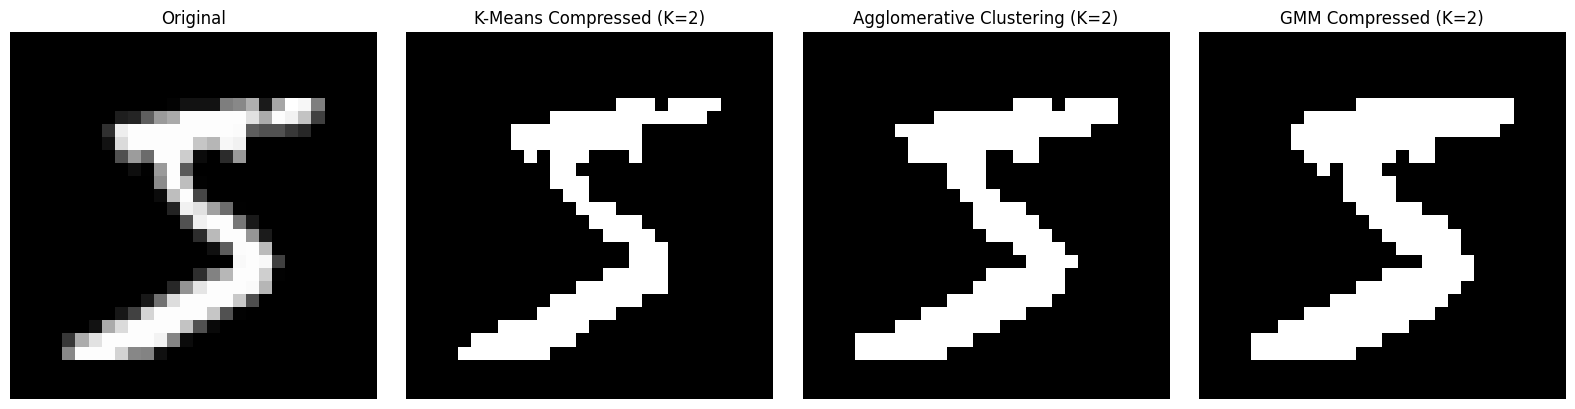

In [308]:
cluster_func(mnist_vector,mnist_img,K=2)

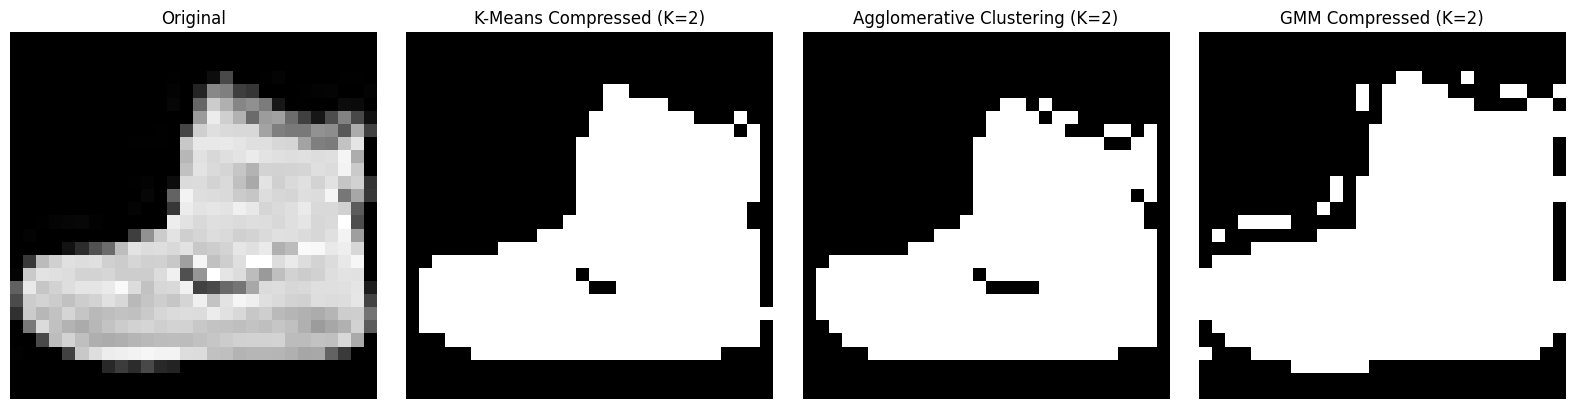

In [304]:
cluster_func(fashion_vector,fashion_img,K=2)

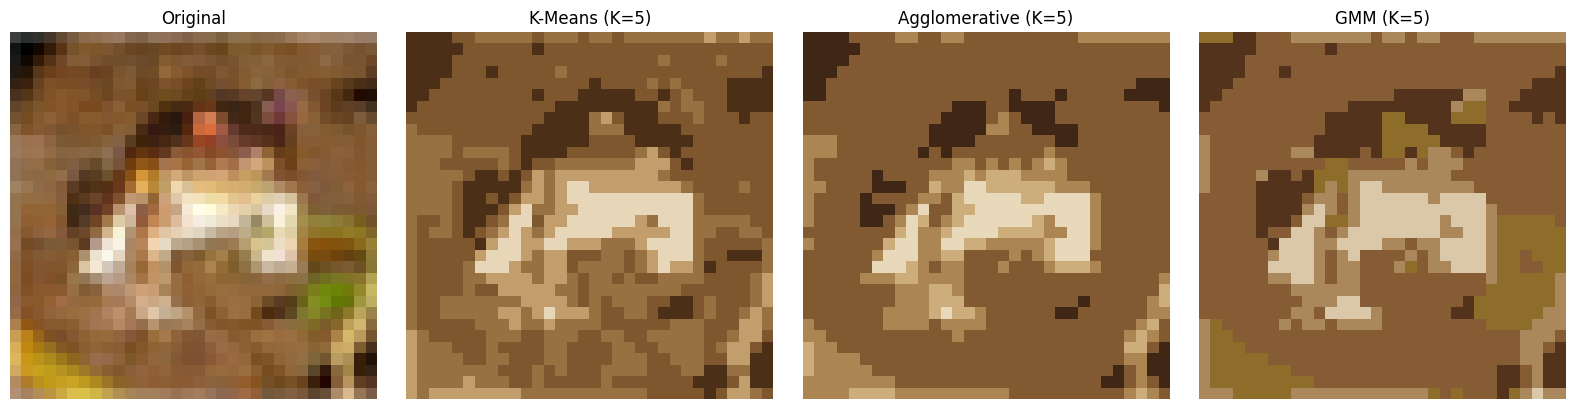

In [306]:
cluster_func_cifar(cifar_vector, cifar_img, K=5)

K-Means and Agglomerative Clustering perform well on MNIST and Fashion-MNIST, producing clear segmentations, while GMM struggles slightly with details. For CIFAR-10, all methods show blocky segmentation, but GMM provides smoother transitions. K-Means is the fastest, while GMM better handles complex distributions. Overall, no single method is best, but K-Means is a strong general choice due to its efficiency.

## Question 20

List pros and cons of each algorithms from what you have seen during the lab.

### **K-means**

**Pros:**
1. Fast and scalable, efficient on large datasets.
2. Simple to understand and implement.

**Cons:**
1. Sensitive to initialization, may give suboptimal results.
2. Assumes spherical clusters, struggles with non-spherical shapes.

---

### **Hierarchical Clustering**

**Pros:**
1. No need to predefine the number of clusters.
2. Captures nested clusters in data.

**Cons:**
1. Computationally expensive (O(n^2) time complexity).
2. Sensitive to noise and outliers.

---

### **Model-based (GMM)**

**Pros:**
1. Probabilistic model, can model complex cluster shapes.
2. Handles elliptical clusters better than K-means.

**Cons:**
1. Assumes Gaussian distributions, may not fit real-world data.
2. Computationally expensive, requires more iterations to converge.
